In [ ]:
# -*- encoding: utf-8 -*-
'''
-------------------------
@File    :   data_explore.ipynb
@Time    :   2021/12/28 17:58:18
@Author  :   Zhongning Jiang 
@Contact :   zhonjiang8-c@my.cityu.edu.hk
@Desc    :   此脚本用于将原始数据及导出的峰值坐标进行裁剪，输出json格式，用于后续打标训练用
-------------------------
'''

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
raw_data_file = "./rawData.csv" # 原始数据
raw_peak_loc_file = "./raw_data_loc.txt" # 原始数据的峰值点坐标

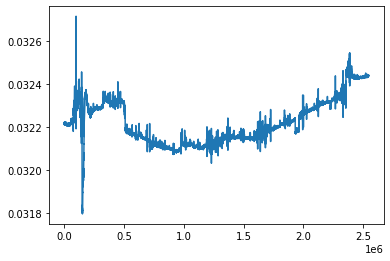

In [3]:
raw_data = np.genfromtxt(raw_data_file, delimiter=",")
plt.plot(raw_data)

In [4]:
with open(raw_peak_loc_file, mode='r', encoding='utf-8') as f:
    lines = f.readlines()
    loc = []
    for line in lines:
        loc.append(int(line))
print(len(loc))


2000


In [5]:
print(raw_data.shape)

(2545061,)


In [28]:
# 根据loc的位置去前后截取raw_data的数据
import tqdm
def data_split(data:np.ndarray, loc_list:list, save_path:str, split_len=150, plot=False):
    import json
    """根据loc的位置去前后截取raw_data的数据
    """
    label = {
        "code": "",
        "label": 0,
        "number of peaks": 0,
        "peaks' labels": [],
        "borders": [],
        "description": "",
        "rt":[],
        "scan": [],
        "intensity": [],
        "mz": [],
    }
    for i, loc in tqdm(enumerate(loc_list)):
        data_slice = data[loc - split_len: loc + split_len].tolist()
        json_save_name = save_path + "peak_sample_" + str(i).zfill(5)
        json_file = json_save_name + ".json"
        # 改写json内容
        label["code"] = "data slice NO_" + str(i).zfill(5)
        label["intensity"] = data_slice
        with open(json_file, mode="w", encoding="utf-8") as jf:
            json.dump(label, jf)
        
        # plot
        if plot:
            plt.figure()
            plt.plot(data_slice)
            fig_save_path = save_path + "/fig/"
            if not os.path.exists(fig_save_path):
                os.makedirs(fig_save_path)
            plt.savefig(fig_save_path + "peak_sample_" + str(i).zfill(5) + ".jpg")
            plt.close("all")

In [29]:
import os
save_path = "./peak_data/"
if not os.path.exists(save_path):
    os.makedirs(save_path)
data_split(data=raw_data, loc_list=loc, save_path=save_path, plot=True)